In [1]:
import numpy
from skimage import data, color
import matplotlib.pyplot as plt
import cv2

Considerando que os gradientes são aplicados como filtros, pela convolução, fora definido a função abaixo, para fazer a convolução 2D, criando uma imagem com uma borda preta do tamanho do kernel, retirando slices da imagem, que são multiplicados pelo kernel, somados e atribuidos novamente a imagem

In [2]:
def Convolucao(a, b):
    #Resguarda o tamanho da janela que sera aplicada a imagem
    ci, cj = numpy.shape(b)
    #Calcula o tamanho da imagem (visto que espera 3 valores de retorno, deve ser uma imagem "colorida")
    imgi, imgj, _ = numpy.shape(a)
    #Cria uma borda reta no tamanho da janela do filtro
    imgBorda = cv2.copyMakeBorder(color.rgb2gray(a), ci, ci, cj, cj, cv2.BORDER_CONSTANT, value=0)
    #Metade do tamanho da janela
    meti = ci//2
    metj = cj//2

    #Imagem para retorno
    imgRet = numpy.zeros((imgi,imgj), numpy.float64)

    #No tamanho da imagem, porem pulando as bordas pretas outrora criadas
    for i in range(meti, meti + imgi - 1):
        for j in range(metj, metj + imgj - 1):
            #Retira uma matrix no tamanho da janela com "centro" no pixel atual
            janela = imgBorda[i-meti:i+(ci-meti), j-metj:j+(cj-metj)]
            #Multipla pelo janela/kernel, depois soma todos os valores, substituindo no pixel atual
            imgRet[i - meti][j - metj] = numpy.sum(numpy.multiply(janela, b))
    return imgRet


Para o operador de sobel, no qual se tem

Hx = [[-1 , 0 , 1][-2 , 0 , 2][-1 , 0 , 1]]       e     Hy = [[-1 , -2 , -1][0 , 0 , 0][1 , 2 , 1]]
                       
                    

Pode ser aplicado, ao que segue o código abaixo ().

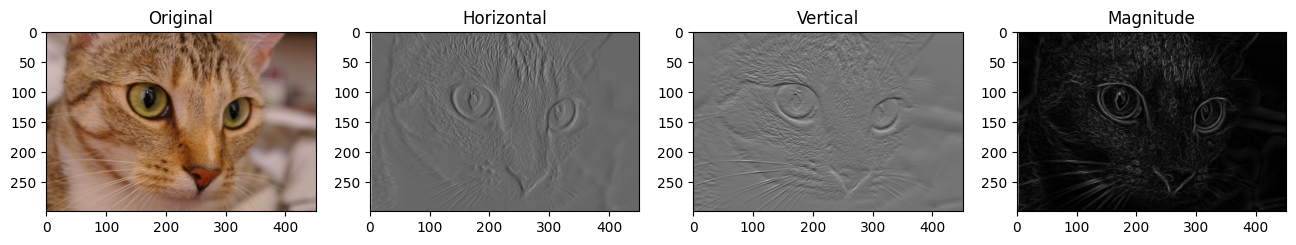

In [3]:
#Cria os operadores
hX = numpy.array([[-1 , 0 , 1], [-2 , 0 , 2], [-1 , 0 , 1]])
hY = numpy.array([[-1 , -2 , -1], [0 , 0 , 0], [1 , 2 , 1]])

#Carrega a imagem (apenas imagens coloridas funcionam com a função convolução criada)
image = data.chelsea()

#Aplica os operadores na horizontal
imgHorz = Convolucao(image, hX)
#... E vertical
imgVert = Convolucao(image, hY)
#Calcula a magnitude utilizando a formula passada (no material de aula provido pelo professor)
imgMagnit = numpy.sqrt(numpy.square(imgHorz) + numpy.square(imgVert))

fig, axs = plt.subplots(1, 4, figsize=(16, 16))
axs[0].set_title('Original')
axs[0].imshow(image, cmap=plt.cm.gray)
axs[1].set_title('Horizontal')
axs[1].imshow(imgHorz, cmap=plt.cm.gray)
axs[2].set_title('Vertical')
axs[2].imshow(imgVert, cmap= plt.cm.gray  )
axs[3].set_title('Magnitude')
axs[3].imshow(imgMagnit, cmap= plt.cm.gray  )

Para o operador de Roberts, no qual se tem

Hx = [[1 , 0][0 , -1]]       e     Hy = [[0 , -1][1 , 0]] 
                       
                    

Pode ser aplicado, ao que segue o código abaixo ().

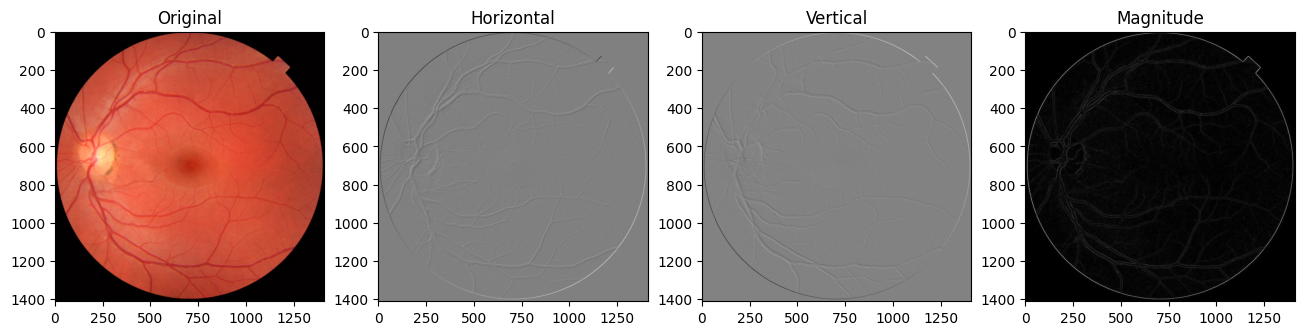

In [4]:
#Cria os operadores
hX = numpy.array([[1 , 0],[0 , -1]]) 
hY = numpy.array([[0 , -1],[1 , 0]])

#Carrega a imagem (apenas imagens coloridas funcionam com a função convolução criada)
image = data.retina()

#Aplica os operadores na horizontal
imgHorz = Convolucao(image, hX)
#... E vertical
imgVert = Convolucao(image, hY)
#Calcula a magnitude utilizando a formula passada (no material de aula provido pelo professor)
imgMagnit = numpy.sqrt(numpy.square(imgHorz) + numpy.square(imgVert))

fig, axs = plt.subplots(1, 4, figsize=(16, 16))
axs[0].set_title('Original')
axs[0].imshow(image, cmap=plt.cm.gray)
axs[1].set_title('Horizontal')
axs[1].imshow(imgHorz, cmap=plt.cm.gray)
axs[2].set_title('Vertical')
axs[2].imshow(imgVert, cmap= plt.cm.gray  )
axs[3].set_title('Magnitude')
axs[3].imshow(imgMagnit, cmap= plt.cm.gray  )

Finalmente, para o operador de Hewitt, que se tem

Hx = [[-1 , 0 , 1], [-1 , 0 , 1], [-1 , 0 , 1]]  e  Hy = [[-1 , -1 , -1], [0 , 0 , 0], [1 , 1 , 1]]

Fora feito um excerto de código, ao que segue abaixo, onde é demonstrada a implementação

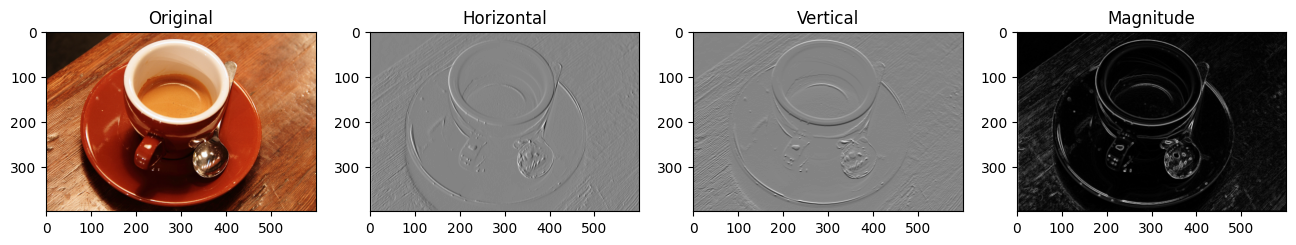

In [7]:
#Cria os operadores
hX = numpy.array([[-1 , 0 , 1], [-1 , 0 , 1], [-1 , 0 , 1]])
hY = numpy.array([[-1 , -1 , -1], [0 , 0 , 0], [1 , 1 , 1]])

#Carrega a imagem (apenas imagens coloridas funcionam com a função convolução criada)
image = data.coffee()

#Aplica os operadores na horizontal
imgHorz = Convolucao(image, hX)
#... E vertical
imgVert = Convolucao(image, hY)
#Calcula a magnitude utilizando a formula passada (no material de aula provido pelo professor)
imgMagnit = numpy.sqrt(numpy.square(imgHorz) + numpy.square(imgVert))

fig, axs = plt.subplots(1, 4, figsize=(16, 16))
axs[0].set_title('Original')
axs[0].imshow(image, cmap=plt.cm.gray)
axs[1].set_title('Horizontal')
axs[1].imshow(imgHorz, cmap=plt.cm.gray)
axs[2].set_title('Vertical')
axs[2].imshow(imgVert, cmap= plt.cm.gray  )
axs[3].set_title('Magnitude')
axs[3].imshow(imgMagnit, cmap= plt.cm.gray  )